Import all the necessary libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
exoplanets = pd.read_csv('cumulative_koi_1.csv')

In [3]:
exoplanets.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,0.000,0,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,0.000,0,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [4]:
exoplanets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Columns: 141 entries, rowid to koi_dikco_msky_err
dtypes: float64(117), int64(7), object(17)
memory usage: 10.3+ MB


Our target column is koi_pdisposition - we want to find out whether the object is a candidate, or false positive. It means that our problem is a binary classification.

In [5]:
exoplanets['koi_pdisposition'].value_counts()

koi_pdisposition
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64

## Dateset clearing

First, we need to remove all NaN values. For this, we can use a Seaborn heatmap to see what rows and columns contain null values.

Columns 0 - 39

<Axes: >

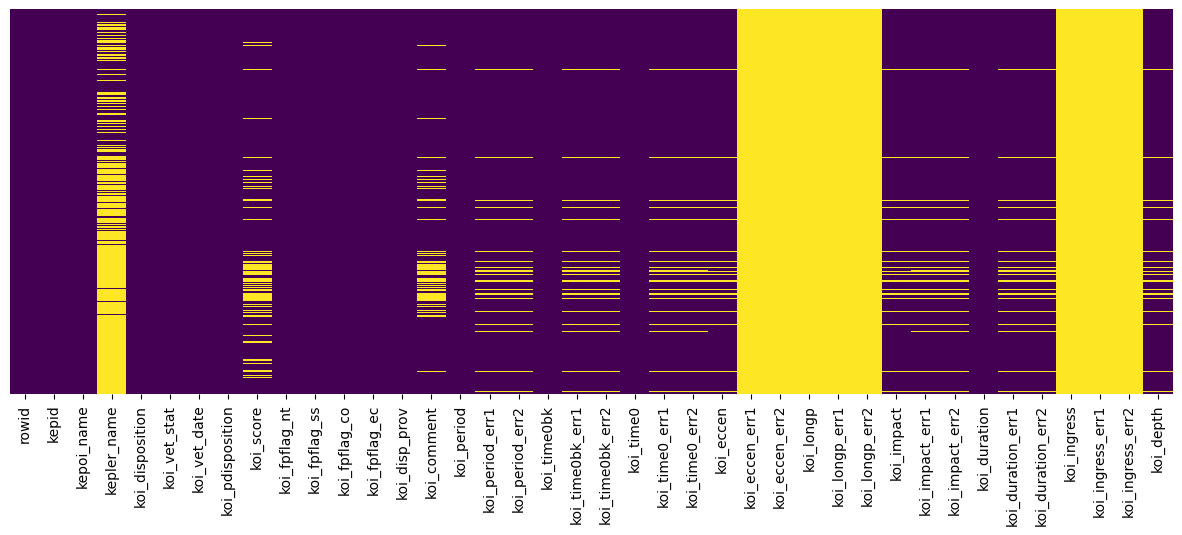

In [6]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(data=exoplanets.iloc[:, :40].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

Columns 40 - 79

<Axes: >

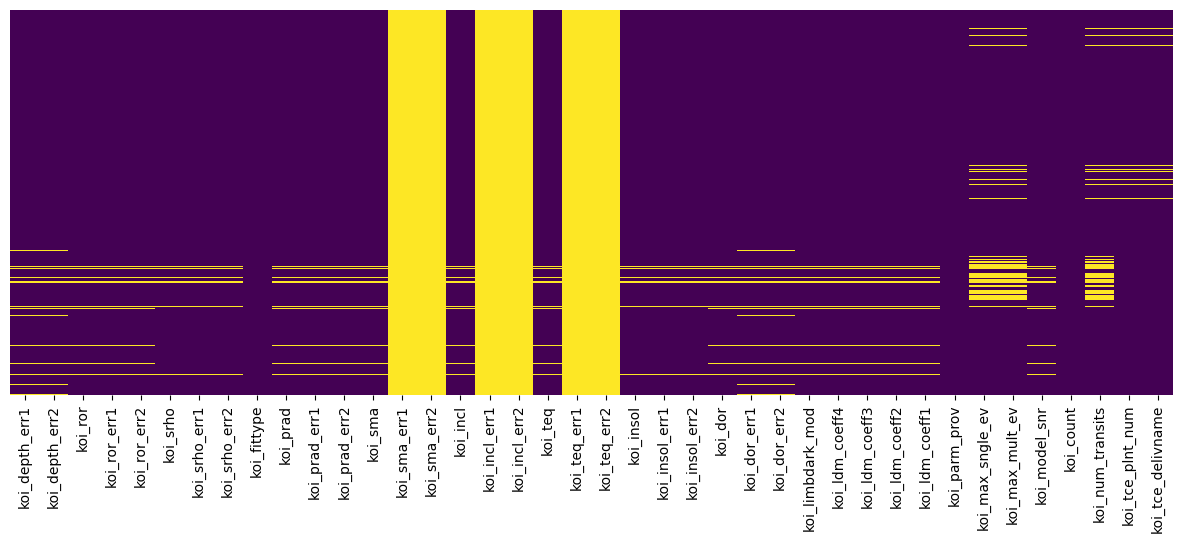

In [7]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(exoplanets.iloc[:,40:80].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

Columns 80 - 140

<Axes: >

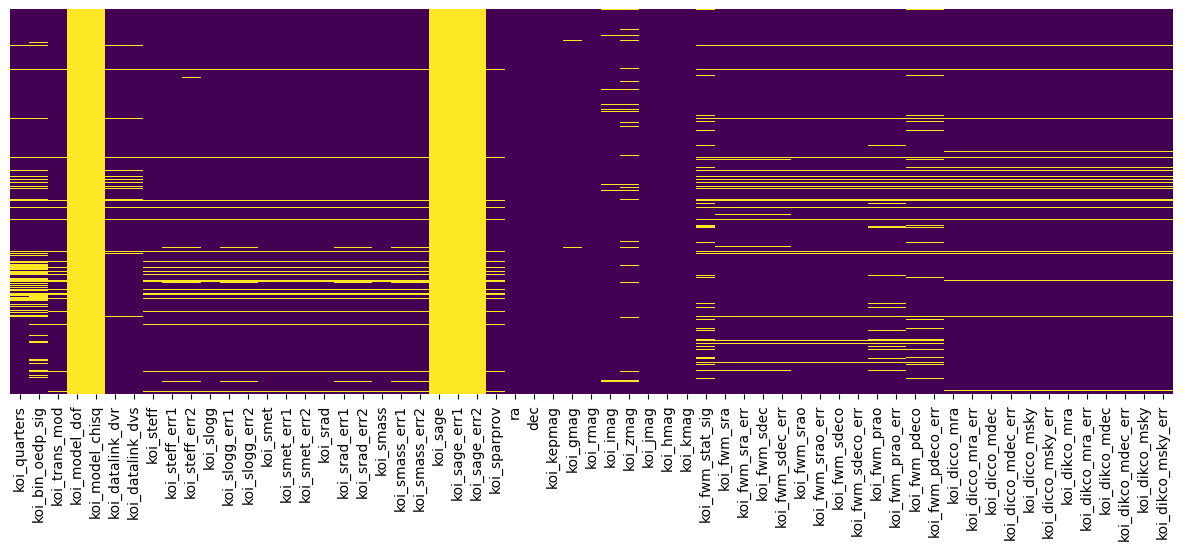

In [8]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(exoplanets.iloc[:,80:].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

We can see that there are a few columns that are completely empty. We need to drop them.

In [9]:
exoplanets = exoplanets.dropna(axis=1, how='all')

Next, we may think of non-numeric columns, since they may not be particularly useful for further analysis.

In [10]:
exoplanets.select_dtypes('object').head()

,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_disp_prov,koi_comment,koi_fittype,koi_limbdark_mod,koi_parm_prov,koi_tce_delivname,koi_quarters,koi_trans_mod,koi_datalink_dvr,koi_datalink_dvs,koi_sparprov
0,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,q1_q17_dr25_sup_koi,NO_COMMENT,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,q1_q17_dr25_tce,11111111111111111000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,q1_q17_dr25_stellar
1,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,q1_q17_dr25_sup_koi,NO_COMMENT,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,q1_q17_dr25_tce,11111111111111111000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,q1_q17_dr25_stellar
2,K00753.01,NaN,CANDIDATE,Done,2018-08-16,CANDIDATE,q1_q17_dr25_sup_koi,DEEP_V_SHAPED,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,q1_q17_dr25_tce,11111101110111011000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010811/010811496/dv/kplr010811496-20160209...,010/010811/010811496/dv/kplr010811496-001-2016...,q1_q17_dr25_stellar
3,K00754.01,NaN,FALSE POSITIVE,Done,2018-08-16,FALSE POSITIVE,q1_q17_dr25_sup_koi,MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,q1_q17_dr25_tce,11111110111011101000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010848/010848459/dv/kplr010848459-20160209...,010/010848/010848459/dv/kplr010848459-001-2016...,q1_q17_dr25_stellar
4,K00755.01,Kepler-664 b,CONFIRMED,Done,2018-08-16,CANDIDATE,q1_q17_dr25_sup_koi,NO_COMMENT,LS+MCMC,Claret (2011 A&A 529 75) ATLAS LS,q1_q17_dr25_koi,q1_q17_dr25_tce,01111111111111111000000000000000,Mandel and Agol (2002 ApJ 580 171),010/010854/010854555/dv/kplr010854555-20160209...,010/010854/010854555/dv/kplr010854555-001-2016...,q1_q17_dr25_stellar


In [11]:
exoplanets.select_dtypes('object').columns

Index(['kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat',
       'koi_vet_date', 'koi_pdisposition', 'koi_disp_prov', 'koi_comment',
       'koi_fittype', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_tce_delivname',
       'koi_quarters', 'koi_trans_mod', 'koi_datalink_dvr', 'koi_datalink_dvs',
       'koi_sparprov'],
      dtype='object')

From these columns it seems we only need koi_pdisposition - other columns contain names, dates, comments, and links. 

In [12]:
exoplanets = exoplanets.drop(['kepoi_name', 'kepler_name', 'koi_disposition', 'koi_vet_stat',
       'koi_vet_date', 'koi_disp_prov', 'koi_comment',
       'koi_fittype', 'koi_limbdark_mod', 'koi_parm_prov', 'koi_tce_delivname',
       'koi_quarters', 'koi_trans_mod', 'koi_datalink_dvr', 'koi_datalink_dvs',
       'koi_sparprov'], axis=1)

In [13]:
exoplanets

,rowid,kepid,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10090151,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,...,-1.757,0.068,2.763,0.074,2.344,0.072,-1.756,0.068,2.929,0.072
9560,9561,10128825,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,...,-0.250,0.490,0.780,0.460,0.500,0.400,-0.180,0.470,0.530,0.470
9561,9562,10147276,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.434000e-06,...,-3.650,0.260,5.000,0.220,3.380,0.160,-3.890,0.260,5.160,0.220
9562,9563,10155286,CANDIDATE,0.092,0,0,0,0,333.486169,4.235000e-03,...,1.320,0.670,1.690,0.530,1.450,0.110,1.370,0.660,2.000,0.460


In addition, we would like to remove rowid and kepid since we already have indices for our rows.

In [14]:
exoplanets = exoplanets.drop(['rowid', 'kepid'], axis=1)

It may also useful to remove koi_score - it's a value between 0 and 1 that is a result of a further statistical analysis on koi_pdisposition and has a high correlation with it.

In [15]:
disposition_comp = pd.get_dummies(exoplanets[exoplanets['koi_score'].notnull()]['koi_pdisposition'])

In [16]:
disposition_comp = disposition_comp.drop(['FALSE POSITIVE'], axis=1)

In [17]:
exoplanets[exoplanets['koi_score'].notnull()]['koi_score'].corr(disposition_comp['CANDIDATE'])

0.9091269189835823

In [18]:
exoplanets = exoplanets.drop(['koi_score'], axis=1)

Empty columns are now removed - need to see what can be done next.

In [19]:
len(exoplanets.columns)

103

Columns 0-49

<Axes: >

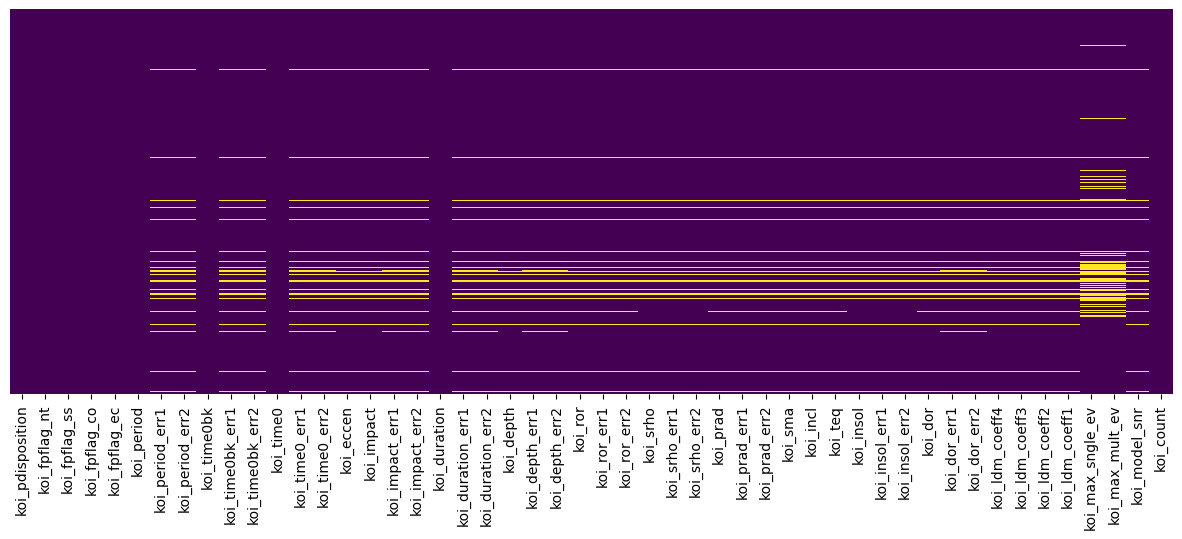

In [20]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(data=exoplanets.iloc[:, :50].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

Columns 50 - 102

<Axes: >

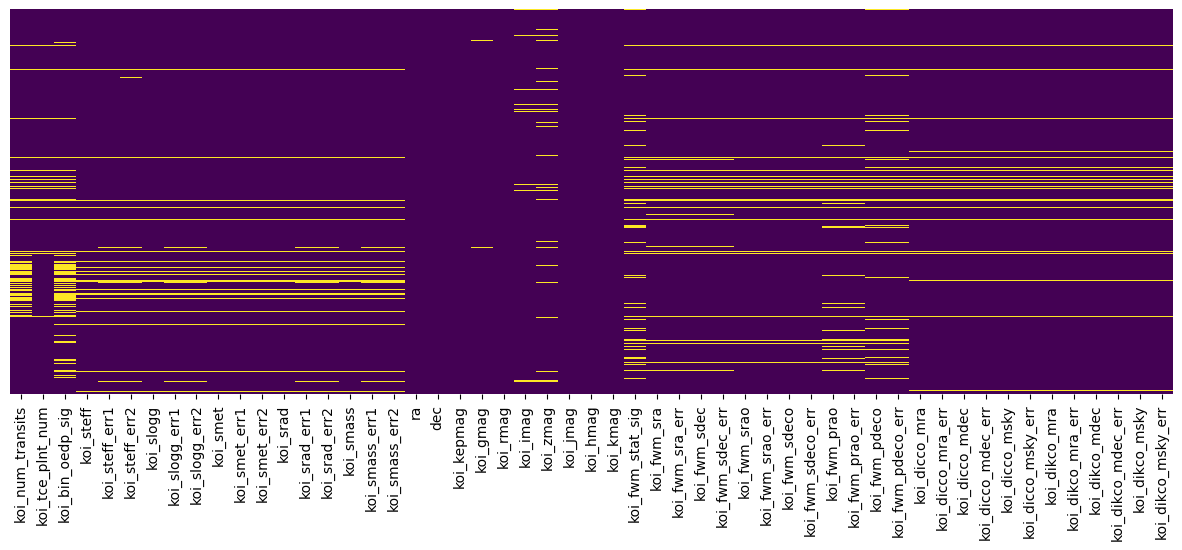

In [21]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(data=exoplanets.iloc[:, 50:].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

We may want to remove some rows, as they may contain too many null values.

In [22]:
missing_rows = exoplanets.isna().sum(axis=1)

In [23]:
missing_rows.sort_values()

0        0
5192     0
5191     0
5190     0
5189     0
        ..
5722    84
7646    84
330     84
1522    85
2210    85
Length: 9564, dtype: int64

Text(0, 0.5, 'Columns')

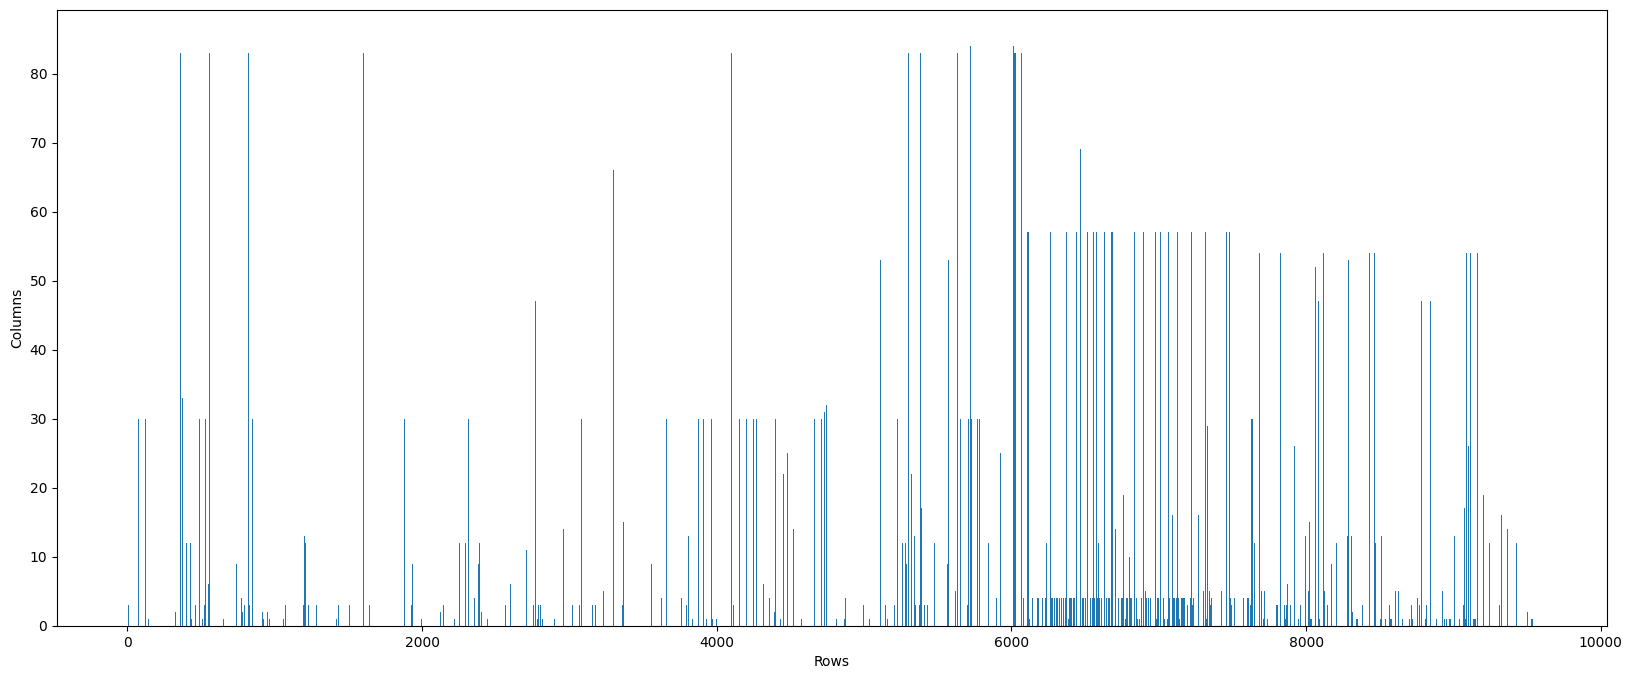

In [24]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x=missing_rows.index, height=missing_rows)
ax.set_xlabel('Rows')
ax.set_ylabel('Columns')

From the plot above we can clearly see that there are rows with 80+ null entries. I think it's best to remove rows that don't have at least half of non-null entries.

In [25]:
exoplanets = exoplanets.dropna(thresh=len(exoplanets.columns)//2)

What we can do next is impute the columns.

In [26]:
def impute_cols(df):
    for col in df.columns:
        if df[col].dtype != 'O':
            df[col] = df[col].fillna(value=df[col].mean())
    return df

In [27]:
exoplanets = impute_cols(exoplanets)

In [28]:
exoplanets.head()

,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,CANDIDATE,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,CANDIDATE,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,CANDIDATE,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,CANDIDATE,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


Columns 0 - 49

<Axes: >

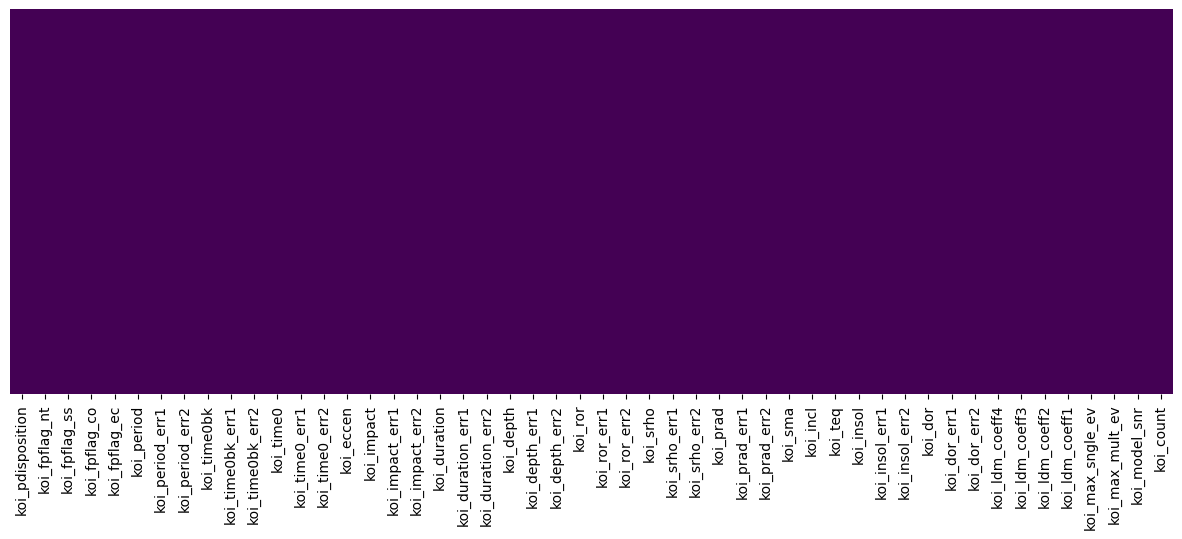

In [29]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(data=exoplanets.iloc[:, :50].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

Columns 50 - 102

<Axes: >

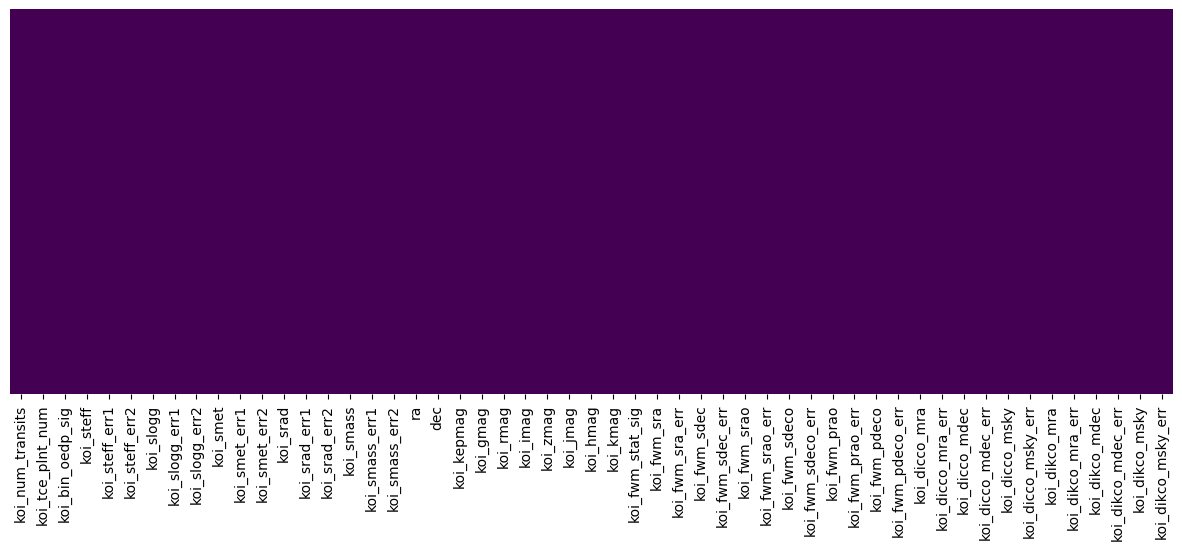

In [30]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.heatmap(data=exoplanets.iloc[:, 50:].isnull(),yticklabels=False,cbar=False,cmap='viridis', ax=ax)

We now don't have non-null values in out dataframe.

What we need to do next is convert out target column to boolean.

In [31]:
disposition = pd.get_dummies(exoplanets['koi_pdisposition'])

In [32]:
disposition = disposition.drop(['FALSE POSITIVE'], axis=1)

In [33]:
exoplanets = pd.concat([exoplanets, disposition], axis=1)

In [34]:
exoplanets = exoplanets.drop(['koi_pdisposition'],axis=1)

## Machine Learning

We then need to create a predictive model. But first, it's a good idea to see what the most important features are. For this, using Gini gain with decision trees is a good option.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = exoplanets.drop(['CANDIDATE'], axis=1)
y = exoplanets['CANDIDATE']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini')
tree = tree.fit(X_train, y_train)


In [46]:
feature_importances = tree.feature_importances_

Text(0.5, 1.0, 'Gini gain bar chart')

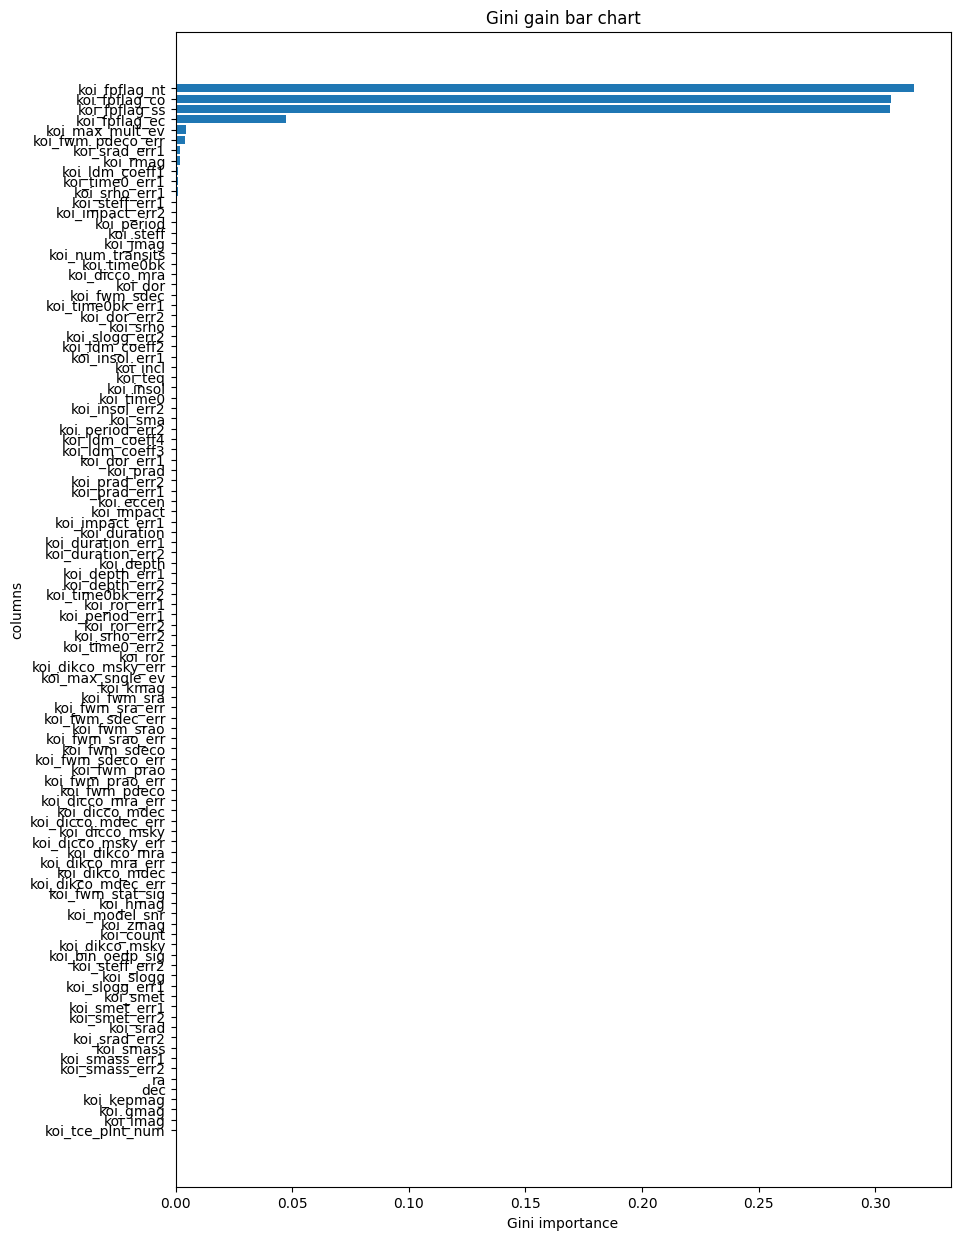

In [50]:
indices_sorted = feature_importances.argsort()
features_sorted = exoplanets.columns[indices_sorted]
importances_sorted = feature_importances[indices_sorted]

fig, ax = plt.subplots(figsize=(10, 15))
ax.barh(y=features_sorted, width=importances_sorted)
ax.set_xlabel('Gini importance')
ax.set_ylabel('columns')
ax.set_title('Gini gain bar chart')

Features koi_fpflag_nt, koi_fpflag_co, koi_fpflag_ss, koi_fpflag_ec have the highest Gini gain.

Next, we need to build a predictive model. We will be using a neural network and first, we need to scale the data.

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout

In [53]:
X_train.shape

(6466, 102)

The network will consist of 3 layers, with first layer containing 102 neurons, 2nd - 51 neurons and 3rd - 1. We will introduce dropout layers and early stopping.

In [54]:
model = Sequential()

model.add(Dense(102, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(51, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [55]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [56]:
model.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/150
203/203 [==============================] - 2s 5ms/step - loss: 0.4554 - val_loss: 0.2284
Epoch 2/150
203/203 [==============================] - 1s 5ms/step - loss: 0.2542 - val_loss: 0.1759
Epoch 3/150
203/203 [==============================] - 1s 4ms/step - loss: 0.2255 - val_loss: 0.1708
Epoch 4/150
203/203 [==============================] - 1s 4ms/step - loss: 0.2075 - val_loss: 0.1625
Epoch 5/150
203/203 [==============================] - 1s 4ms/step - loss: 0.2088 - val_loss: 0.1649
Epoch 6/150
203/203 [==============================] - 1s 3ms/step - loss: 0.2005 - val_loss: 0.1732
Epoch 7/150
203/203 [==============================] - 1s 3ms/step - loss: 0.1924 - val_loss: 0.1652
Epoch 8/150
203/203 [==============================] - 1s 3ms/step - loss: 0.1858 - val_loss: 0.1601
Epoch 9/150
203/203 [==============================] - 1s 3ms/step - loss: 0.1855 - val_loss: 0.1588
Epoch 10/150
203/203 [==============================] - 1s 3ms/step - loss: 0.1800 - val_lo

<Axes: >

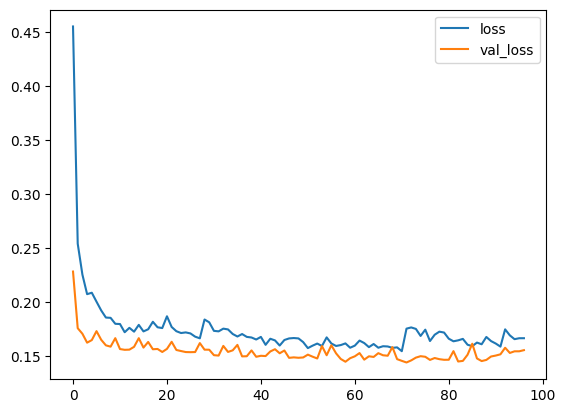

In [57]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = (model.predict(X_test) > 0.5).astype('int32')

print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

87/87 [==============================] - 0s 2ms/step
Classification Report
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      1371
        True       0.92      0.95      0.93      1401

    accuracy                           0.93      2772
   macro avg       0.93      0.93      0.93      2772
weighted avg       0.93      0.93      0.93      2772



Confusion Matrix
[[1253  118]
 [  71 1330]]
